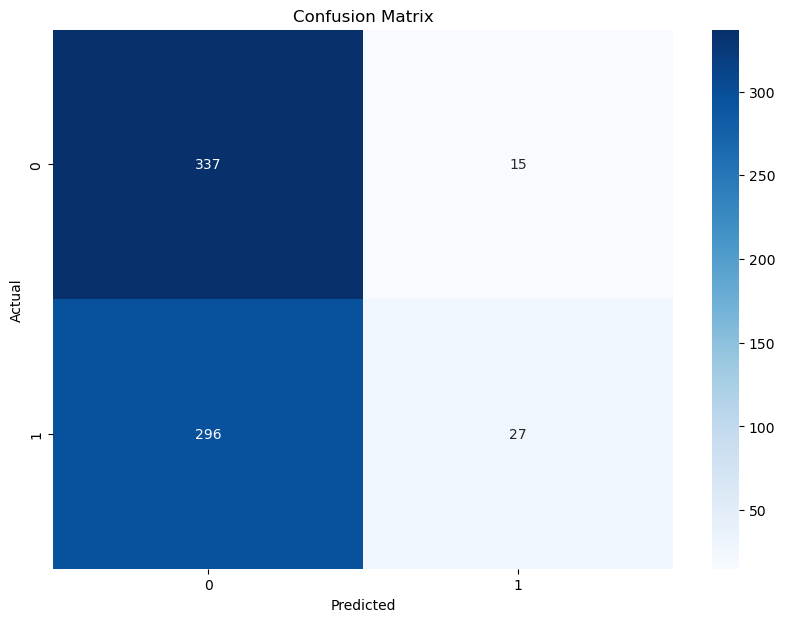

Mean Squared Error: 0.46074074074074073
R-squared: -0.8463710244863498
Accuracy: 0.5392592592592592
Precision: 0.6428571428571429
Recall: 0.08359133126934984
Confusion Matrix:
 [[337  15]
 [296  27]]


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Lineer Regresyon yerine sınıflandırma modeli
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Veri setini yükle
data = pd.read_csv("data.csv")

# 1. Veri Ön İşleme

# Hedef değişkeni (örneğin, powertrain kategorisini tahmin edelim) belirleyin.
data['powertrain_binary'] = (data['powertrain'] == 'BEV').astype(int) # BEV ise 1, değilse 0
y = data['powertrain_binary'][data['parameter'] == 'EV sales']

# Bağımsız değişkenleri (örneğin, 'year', 'region', 'value') seçin.
features = ['year', 'region', 'value']
X = pd.get_dummies(data[features][data['parameter'] == 'EV sales'], columns=['region'])

# Veri setini eğitim ve test setlerine ayırın.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Eğitimi

# Bir tahmin modeli (örneğin, Lojistik Regresyon) oluşturun.
model = LogisticRegression()

# Modeli eğitim verileriyle eğitin.
model.fit(X_train, y_train)

# 3. Model Değerlendirme

# Test verilerini kullanarak tahminlerde bulunun.
y_pred = model.predict(X_test)

# Model performansını değerlendirmek için metrikleri hesaplayın (MSE, R-kare, Accuracy, Precision, Recall)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Grafik çizimi
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

# Metrikleri yazdırın.
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n {cm}")

### ekstradan başka bir model ile eğitim (bonus)

In [5]:
# Farklı model denemeleri (örnek olarak Decision Tree Regressor)
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor modelini oluştur
tree_model = DecisionTreeRegressor(random_state=42)

# Modeli eğitim verileriyle eğit
tree_model.fit(X_train, y_train)

# Test verileriyle tahmin yap
tree_y_pred = tree_model.predict(X_test)

# MSE ve R2 skorunu hesapla
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)

# Sonuçları yazdır
print("\nDecision Tree Regressor:")
print("Ortalama Karesel Hata (MSE):", tree_mse)
print("R-kare (R2) Skoru:", tree_r2)

# Model karşılaştırma
print("\nModel Karşılaştırması:")
print(f"Logistic Regression MSE: {mse:.2f}, R2: {r2:.2f}")
print(f"Decision Tree MSE: {tree_mse:.2f}, R2: {tree_r2:.2f}")



Decision Tree Regressor:
Ortalama Karesel Hata (MSE): 0.31296296296296294
R-kare (R2) Skoru: -0.2541668132564032

Model Karşılaştırması:
Logistic Regression MSE: 0.46, R2: -0.85
Decision Tree MSE: 0.31, R2: -0.25
